In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/sylva/OneDrive/Bureau/barometre/donnees_brutes_2021.csv", sep=";")

C:\Users\sylva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
var_indicateur=['Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global', 'Indicateur_global_declare']

In [4]:
def yo_float(x):
    return float(str(x).replace(',','.'))
p=re.compile('(\D*) \(([0-9]{2,2})[0-9]{3,3}\)')
def yo_ville(x):
    m=p.match(x)
    return m.group(1)+' ' +m.group(2)
df['Ville']=df['Commune'].apply(yo_ville)

def indicateurs_nombres(df1, liste_indicateur=var_indicateur):
    for indicateur in var_indicateur :
        if indicateur in df1.columns:
            df1[indicateur]=df1[indicateur].apply(yo_float)
    return df1
df=indicateurs_nombres(df)

In [5]:
df_Marseille= df[df['Ville']=='Marseille 13']

In [12]:
df.columns

Index(['Commune', 'Code_INSEE', 'Commune_cp', 'Dep', 'Cp', 'Nom_dep',
       'Nom_region', 'Malvoyant', 'Taille_commune_2', 'Pratique de la marche',
       'Deplacement_a_pied_vie_courante', 'Deplacement_a_pied_loisir',
       'Lieu_marche', 'Deplacement_a_pied', 'Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecout

In [33]:
for i in pd.unique(df_Marseille['Age_repondant']) :
    print( sum(df_Marseille['Age_repondant']==i),i)

249 De 26 à 34 ans
277 De 65 à 74 ans
253 De 35 à 44 ans
50 De 18 à 25 ans
239 De 55 à 64 ans
249 De 45 à 54 ans
56 75 ans et plus


In [32]:
for i in pd.unique(df_Marseille['Membre_association_marche']) :
    print( sum(df_Marseille['Membre_association_marche']==i),i)

259 Oui
1102 Non
0 nan


In [31]:
for i in pd.unique(df_Marseille['Membre_association_defense_pietons']) :
    print( sum(df_Marseille['Membre_association_defense_pietons']==i),i)

1346 Non
15 Oui
0 nan


In [30]:
for i in pd.unique(df_Marseille['Lors_de_vos_deplacements']) :
    print( sum(df_Marseille['Lors_de_vos_deplacements']==i),i)

185 Un utilisateur des transports en commun
750 Un marcheur, un piéton
165 Un utilisateur de véhicule motorisé (moto et autres deux roues, voitures à moteur à essence, gasoil...)
202 Un cycliste ou un utilisateur d'engin de déplacement personnel (vélo, trottinette, skate, roller…)
16 Une personne a mobilité réduite
43 Un utilisateur d'engin de déplacement personnel à assistance électrique (vélo, trottinette, skate électrique...)
0 nan


In [29]:
for i in pd.unique(df_Marseille['Lieu_marche']) :
    print( sum(df_Marseille['Lieu_marche']==i),i)

1206 Dans les espaces urbanisés*
167 Hors des espaces urbanisés


In [34]:
for i in pd.unique(df_Marseille['Sexe_repondant']) :
    print( sum(df_Marseille['Sexe_repondant']==i),i)

781 Femme
567 Homme
25 Ne souhaite pas répondre


In [35]:
for i in pd.unique(df_Marseille['Abonnement_transport_commun']) :
    print( sum(df_Marseille['Abonnement_transport_commun']==i),i)

746 Oui
627 Non


In [16]:
notes=['Deplacement_a_pied', 'Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information',
       'Resume_condition_marche']
for note in notes:
    print(note, np.mean((df_Marseille[note]-1)*4))

Deplacement_a_pied 6.380602498163116
Agencement_voirie 4.420279206465834
conflits_pietons 4.737692872887583
Conducteurs_respectent 3.7648787656135196
Circulation_vehicules_motorises 3.8001469507714916
Deplacements_pied_commune 8.041146216017633
Marche_securite 7.238795003673769
Securite_rues_services 8.878765613519471
Securite_rues_residentielles 8.96105804555474
Securite_rejoindre_communes_voisines 4.3703159441587065
Acces_pietons 7.990769230769231
Marche_separe_circulation 16.32623071271124
Marche_separe_autres_mobilites 14.609845701689935
Traverse_carrefour 5.322556943423953
Deplacements_enfants_personnes_agees 2.9360764144011755
Deplacements_enfants_ecole 3.600293901542983
Pistes_cyclables 5.396032329169728
Espaces_pietons 3.224099926524614
Espaces_pietons_libres_empietements 2.1719324026451137
Espaces_pietons_entretenus 4.129316678912565
Espaces_pietons_travaux 4.890521675238795
Signaletique_specifique 4.008817046289493
Amenagements_confort_marcheurs 3.3034533431300512
Trottoirs_e

In [27]:
df_Mars_hors=df_Marseille[df_Marseille['Lieu_marche']=='Hors des espaces urbanisés']
for i in pd.unique(df_Mars_hors['Membre_association_marche']):
    print( sum(df_Mars_hors['Membre_association_marche']==i),i)

103 Non
60 Oui
0 nan


In [25]:
for note in notes:
    print(note, np.mean((df_Marseille[df_Marseille['Lieu_marche']=='Hors des espaces urbanisés'][note]-1)*4)-np.mean((df_Marseille[note]-1)*4))

Deplacement_a_pied 1.1776797104258412
Agencement_voirie 0.9048741677672956
conflits_pietons 0.6856200105479999
Conducteurs_respectent 0.7749985349999777
Circulation_vehicules_motorises 0.8624297363450726
Deplacements_pied_commune -0.875502044238492
Marche_securite 0.5648859779213229
Securite_rues_services 0.593627024517339
Securite_rues_residentielles 1.5665493164084499
Securite_rejoindre_communes_voisines 0.7339785343689007
Acces_pietons 0.29681246857717536
Marche_separe_circulation -0.3998503446130801
Marche_separe_autres_mobilites -0.5730358857390137
Traverse_carrefour 0.22345532651469746
Deplacements_enfants_personnes_agees 0.7449051806908491
Deplacements_enfants_ecole 0.8905036444692866
Pistes_cyclables 0.17451981806953576
Espaces_pietons 0.8004399507759992
Espaces_pietons_libres_empietements 0.969171891833414
Espaces_pietons_entretenus 0.16516184869479744
Espaces_pietons_travaux 0.7781899812029227
Signaletique_specifique 0.5801400089252313
Amenagements_confort_marcheurs 0.3284484

In [17]:
for note in notes:
    print(note, np.mean((df_Marseille[note]-1)*4)-np.mean((df[note]-1)*4))

Deplacement_a_pied -4.640404128088118
Agencement_voirie -5.155452735824687
conflits_pietons -5.787237809945258
Conducteurs_respectent -5.584902709079841
Circulation_vehicules_motorises -4.905337329504837
Deplacements_pied_commune -1.5815804158729634
Marche_securite -4.087771094357152
Securite_rues_services -3.630656821745344
Securite_rues_residentielles -3.472420971316353
Securite_rejoindre_communes_voisines -4.011938861048305
Acces_pietons -3.6406319459577245
Marche_separe_circulation 0.07452715521323583
Marche_separe_autres_mobilites 0.28492441779501476
Traverse_carrefour -3.911899562990822
Deplacements_enfants_personnes_agees -5.117967478638911
Deplacements_enfants_ecole -4.887135018988996
Pistes_cyclables -3.8991717500651806
Espaces_pietons -4.833610908355665
Espaces_pietons_libres_empietements -4.952159991085647
Espaces_pietons_entretenus -6.227804358754565
Espaces_pietons_travaux -4.502527646846878
Signaletique_specifique -3.699809031676529
Amenagements_confort_marcheurs -4.03728

Indicateur_ressenti_global


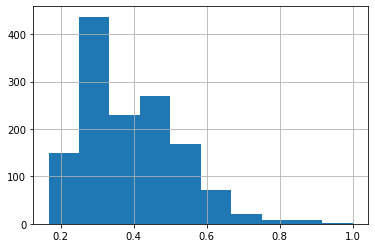

Indicateur_securite


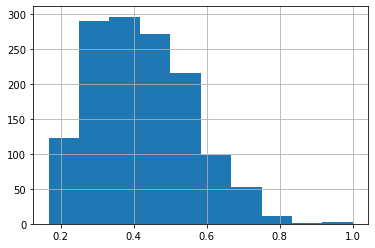

Indicateur_confort


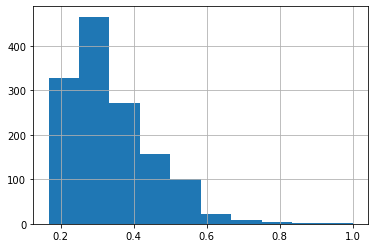

Indicateur_effort_ville


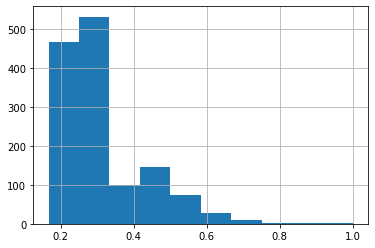

Indicateur_amenagements_services


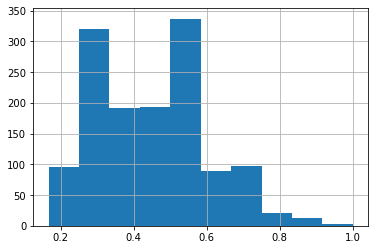

Indicateur_global


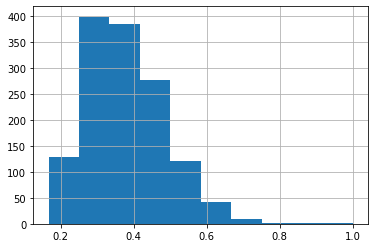

Indicateur_global_declare


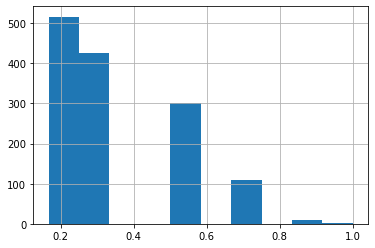

In [11]:
for i in var_indicateur :
    print(i)
    df_Marseille[i].hist()
    plt.show()

In [13]:
questions=['Deplacement_a_pied', 'Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information',
       'Resume_condition_marche']

Deplacement_a_pied


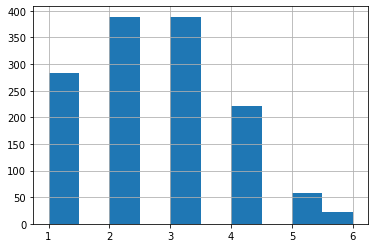

Agencement_voirie


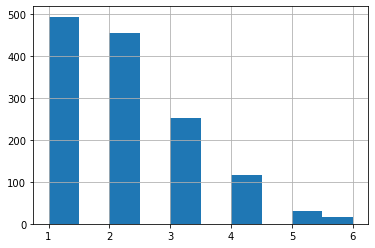

conflits_pietons


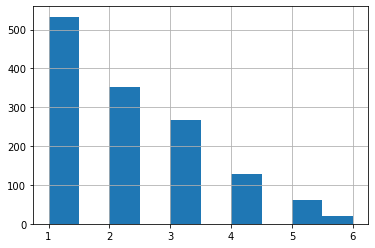

Conducteurs_respectent


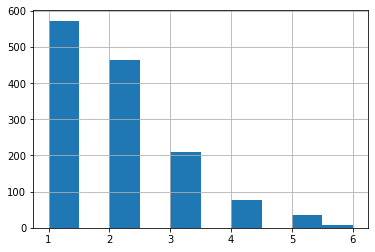

Circulation_vehicules_motorises


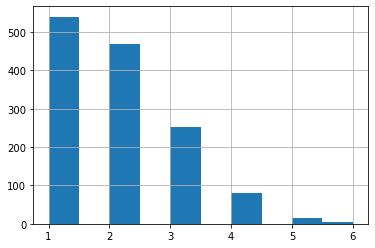

Deplacements_pied_commune


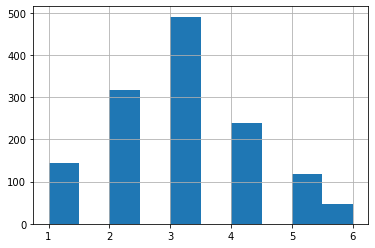

Marche_securite


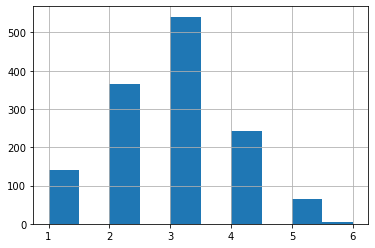

Securite_rues_services


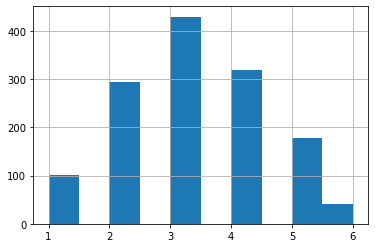

Securite_rues_residentielles


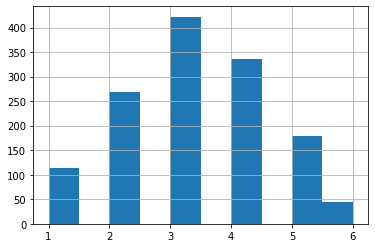

Securite_rejoindre_communes_voisines


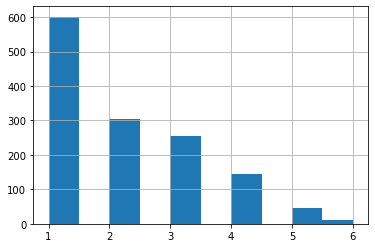

Acces_pietons


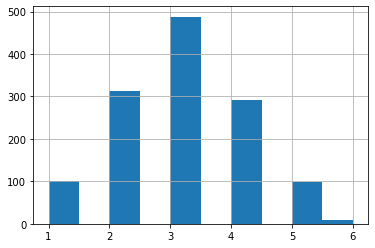

Marche_separe_circulation


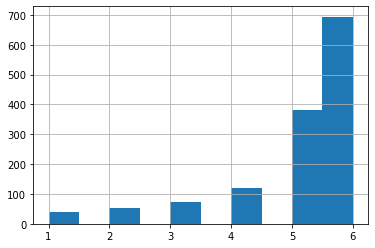

Marche_separe_autres_mobilites


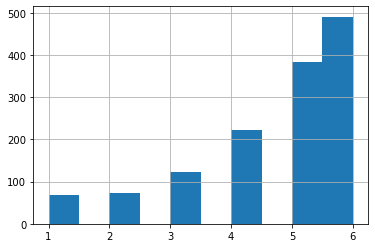

Traverse_carrefour


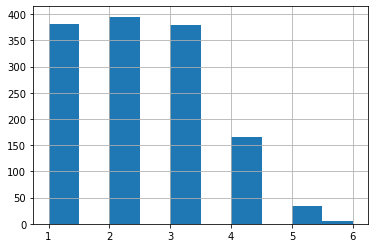

Deplacements_enfants_personnes_agees


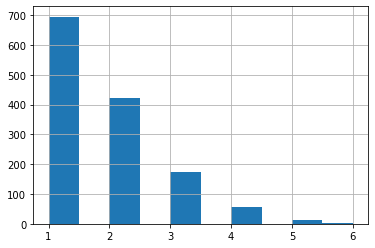

Deplacements_enfants_ecole


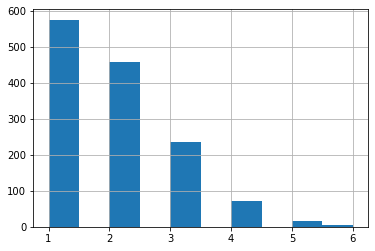

Pistes_cyclables


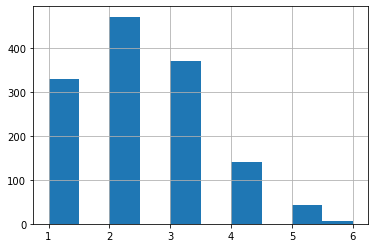

Espaces_pietons


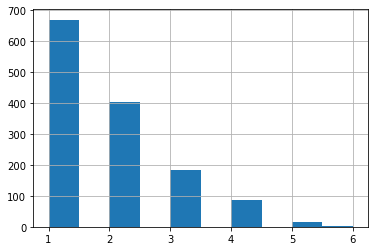

Espaces_pietons_libres_empietements


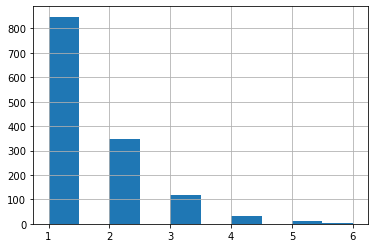

Espaces_pietons_entretenus


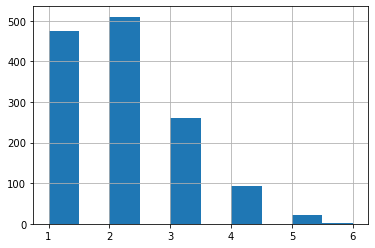

Espaces_pietons_travaux


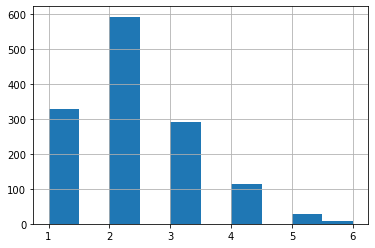

Signaletique_specifique


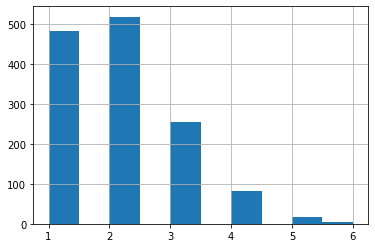

Amenagements_confort_marcheurs


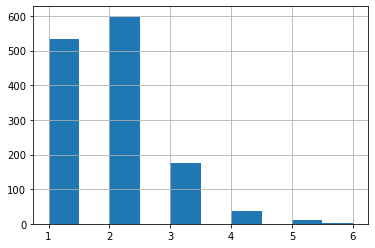

Trottoirs_eclaires


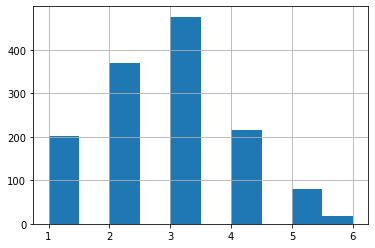

Commune_ecoute_pietons


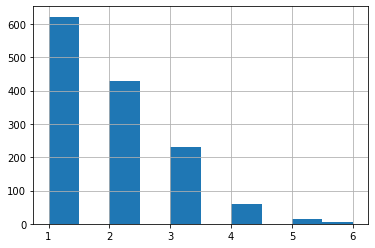

Commune_effort_marche


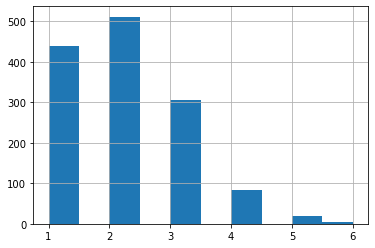

Situation_pietons


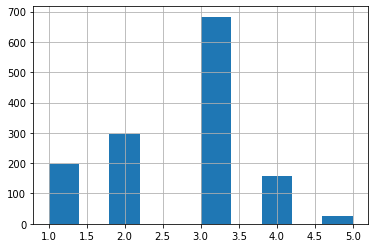

Promotion_deplacement


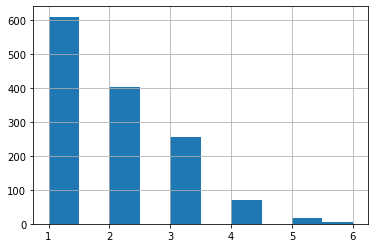

Stationnement_espaces_pietons


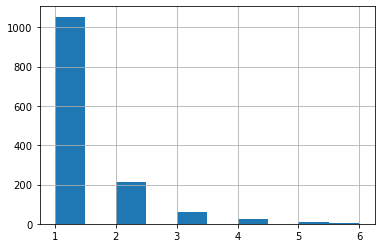

Acces_transport_commun


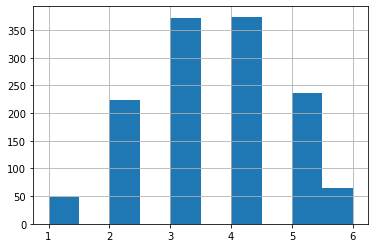

Signaletique


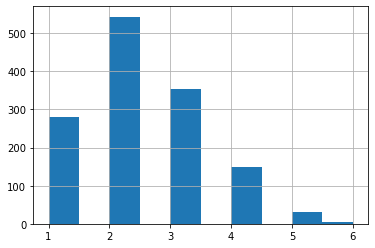

Information


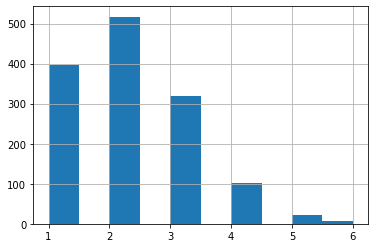

Resume_condition_marche


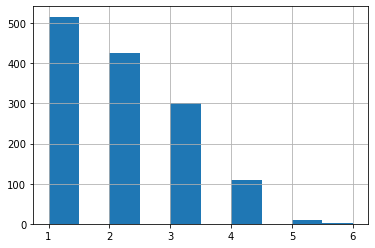

In [14]:
for i in questions :
    print(i)
    df_Marseille[i].hist()
    plt.show()

Stationnement espace piéton = énorme point noir ! 

In [40]:
possibilite=["Verbaliser davantage le stationnement sur les passages piétons et les trottoirs", 
                 "Réserver l'usage des trottoirs aux déplacements à pied", "Modérer la vitesse des véhicules motorisés dans les lieux fréquentés par les piétons",
                "Constituer un réseau complet de cheminements piétons dans la ville", "Davantage de lieux où les piétons sont prioritaires",
                "plus larges, bien entretenus, sécurisés et désencombrés",
                 "Des actions de communication pour développer le gout et le plaisir de la marche",
                "Faciliter l'accès à pied des transports publics et lieux accueillant du public ",
                "Une signalétique adaptée aux piétons", "Des circulations piétonnes éloignées ou protégées  des zones bruyantes",
                "Une meilleure qualité de l'air", "Un meilleur accès aux transports en commun pour faciliter leur usage par les piétons",
                "Un environnement des cheminements piétons plus agréables : végétation, paysage...",
                "Rendre la marche plus agréable pour les piétons : banc de repos, toilettes, eau potable…",
                "Traiter les points noirs et les coupures urbaines ..."]
nom_col=['Verbaliser','Reserver', 'Vitesse', 'Compléter', 'Priorite','Trottoir', 'Communication', 'Acces', 'Signaletique',
            'Bruit', 'Air', 'Transport', 'Environnement', 'Agreable', 'Point_noir']
def proposition(df1):
    for nombre in range(len(possibilite)):
        p=re.compile(possibilite[nombre])
        liste=[]
        for i in df1['Criteres_importants']:
            m=p.search(str(i))
            if m==None:
                liste.append(0)
            else:
                liste.append(1)
        df1[nom_col[nombre]]=np.array(liste)
proposition(df_Marseille)

In [55]:
liste1=[]
liste2=[]
for i in nom_col :
    liste1.append(i)
    liste2.append(sum(df_Marseille[i]))
conseils=pd.DataFrame(liste1)
conseils['nombre']=np.array(liste2)
conseils.sort_values('nombre', ascending=False)

,0,nombre
5,Trottoir,747
0,Verbaliser,629
1,Reserver,511
12,Environnement,331
13,Agreable,268
2,Vitesse,262
3,Compléter,250
14,Point_noir,237
4,Priorite,205
10,Air,205


In [57]:
df_Mars_jamais=df_Marseille[df_Marseille['Pratique de la marche']=='Presque jamais/Presque jamais']

In [59]:
possibilite=["Trop de véhicules motorisés", "Pas assez d'aménagements piétons et marcheurs", "Trop de pollutions",
            "Je préfère utiliser ma voiture", "Vitesse des véhicules motorisés trop élévée", "Je ne me sens pas en sécurité à pied",
            "Les cheminements n'offrent pas assez d'agrément", "Espaces piétons trop encombrés", "Trop de bruit",
             "Espaces piétons trop utilisés par d'autres mobilités actives", "Je préfère utiliser une autre mobilité active",
            "J'habite trop loin de mes lieux de destination", "Pour des raisons de santé, parce que j'ai du mal a me déplacer à pied",
            "Parce que c'est trop lent", "Je ne sais pas", "Je n'aime pas la marche", "En raison des risques météo"]
nom_col=['Trop_voitures', 'Pas_amenagement', 'Pollution', 'Voiture', 'Voitures_trop_rapides', 'Pas_securite', 'Pas_agreable',
        'Encombrement', 'Bruit', 'Velo_embetant', 'Velo', 'Loin', 'Sante', 'Lent', 'NSP', 'Desamour', 'Meteo']
def pourquoi_pas(df1):
    for nombre in range(len(possibilite)):
        p=re.compile(possibilite[nombre])
        liste=[]
        for i in df1['Raisons_pas_deplacement_pied']:
            m=p.search(str(i))
            if m==None:
                liste.append(0)
            else:
                liste.append(1)
        df1[nom_col[nombre]]=np.array(liste)
pourquoi_pas(df_Mars_jamais)

<ipython-input-59-ebc37ad656ef>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nom_col[nombre]]=np.array(liste)


In [60]:
liste1=[]
liste2=[]
for i in nom_col :
    liste1.append(i)
    liste2.append(sum(df_Mars_jamais[i]))
conseils=pd.DataFrame(liste1)
conseils['nombre']=np.array(liste2)
conseils.sort_values('nombre', ascending=False)

,0,nombre
11,Loin,7
1,Pas_amenagement,4
2,Pollution,3
0,Trop_voitures,2
3,Voiture,2
5,Pas_securite,2
6,Pas_agreable,2
7,Encombrement,2
13,Lent,1
12,Sante,1


### Commentaires

In [61]:
df_Marseille[['Endroit_problematique_pieton','Commentaires', 'Endroit_le_plus_apprecie']].to_csv(r'C:\Users\sylva\OneDrive\Bureau\verbatims demandes\marseille.csv', index=False, sep=';')

In [ ]:
df_comment_marseille=df_Marseille['Commentaires']